## DSC540 project milestone 5
#### Author: Xin Tang
### date: 2/26/2024

#### Merging the Data and Storing in a Database/Visualizing Data

In [1]:
# import package
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlalchemy as sqla

In [2]:
# step 1. load data file
df_flight = pd.read_csv('Feb-departure.csv')
df_IATA = pd.read_csv('IATA_code.csv')
df_weather = pd.read_csv('weather_check.csv')

In [3]:
#step 2. create/connect to SQLite database

# create a db named as Austin_flight

connection =sqlite3.connect('Austin_flight.db')

#load flight data frame and name table as 'flight_info'
df_flight.to_sql('flight_info', connection, if_exists ='replace')
#connection.close()

#load IATA data frame and name table as 'IATA_info'
#connection = sqlite3.connect('IATA.db')
df_IATA.to_sql('IATA_info', connection, if_exists ='replace')
#connection.close()

#load weather data frame and name table as 'weather_info'
#connection = sqlite3.connect('weather.db')
df_weather.to_sql('weather_info', connection, if_exists ='replace')

#connection.close()

28

In [4]:
# Confirmed tables have been created successful
def is_opened(conn):
    try:
        connection.execute("SELECT * FROM flight_info LIMIT 1")
        return True
    except sqlite3.ProgrammingError as e:
        print("Connection closed {}".format(e))
        return False
    
print(is_opened(connection)) 
connection.close()

True


In [5]:
# Join 3 tables together

'''
use DAY to join the flight_info table with weather_info table
use airport code to join flight_ino table with IATA table
'''

conn = sqlite3.connect('Austin_flight.db')
c = conn.cursor()
c.execute("PRAGMA foreign_keys = 1")
sql = """
    select * FROM flight_info
    JOIN weather_info ON flight_info.DAY = weather_info.DAY
    JOIN IATA_info ON flight_info.ORIGIN_AIRPORT = IATA_info.IATA
    WHERE IATA_info.IATA = 'AUS'
"""    

#print out first row to validate the join is successful
rows = c.execute(sql)
for row in rows:
    print(row)
    break

(0, 3376, 2, 1, 'WN', 4811, 'AUS', 'BNA', 556, -4, 0, 0, 'clear sky', 18.0, 8.9, 2, 1, '2/1/2024', '12:00:00', 0, 3, 'Austin', 'AUS', 'AUS', 'Austin Bergstrom International Airport', 'P-L')


In [6]:
#export dataset to a dataframe for visualization
# the dataframe has all columns of all 3 tables.
data =[]
columns = ['s1','serial', 'month','day','airline','flight_number','from','destination','depart_time','delay','cancelled','s2',
           'weather','temp_in_c','wind_speed','month2','day2','date','time','s2','s4','City','FAA','IATA','airport name',
           'role'
          ]

rows = c.execute(sql)
for row in rows:
    data.append(row)
    
df = pd.DataFrame(data, columns=columns)    
df.head()

,s1,serial,month,day,airline,flight_number,from,destination,depart_time,delay,...,day2,date,time,s2,s4,City,FAA,IATA,airport name,role
0,0,3376,2,1,WN,4811,AUS,BNA,556,-4,...,1,2/1/2024,12:00:00,0,3,Austin,AUS,AUS,Austin Bergstrom International Airport,P-L
1,1,3377,2,1,OO,6235,AUS,SFO,600,0,...,1,2/1/2024,12:00:00,0,3,Austin,AUS,AUS,Austin Bergstrom International Airport,P-L
2,2,3378,2,1,B6,794,AUS,JFK,558,-9,...,1,2/1/2024,12:00:00,0,3,Austin,AUS,AUS,Austin Bergstrom International Airport,P-L
3,3,3379,2,1,DL,1984,AUS,ATL,627,-3,...,1,2/1/2024,12:00:00,0,3,Austin,AUS,AUS,Austin Bergstrom International Airport,P-L
4,4,3380,2,1,WN,4541,AUS,BWI,627,-3,...,1,2/1/2024,12:00:00,0,3,Austin,AUS,AUS,Austin Bergstrom International Airport,P-L


In [7]:
# create new df with less columns
new_df = df[['month','day', 'airline','flight_number', 'destination','delay', 'weather','temp_in_c','wind_speed', 'airport name']]
new_df.head()

,month,day,airline,flight_number,destination,delay,weather,temp_in_c,wind_speed,airport name
0,2,1,WN,4811,BNA,-4,clear sky,18.0,8.9,Austin Bergstrom International Airport
1,2,1,OO,6235,SFO,0,clear sky,18.0,8.9,Austin Bergstrom International Airport
2,2,1,B6,794,JFK,-9,clear sky,18.0,8.9,Austin Bergstrom International Airport
3,2,1,DL,1984,ATL,-3,clear sky,18.0,8.9,Austin Bergstrom International Airport
4,2,1,WN,4541,BWI,-3,clear sky,18.0,8.9,Austin Bergstrom International Airport


In [9]:
# select American flight to DFW for analysis
# this will be the dataframe to do plot
df2 =new_df[(new_df['airline']=='AA') & (new_df['destination']=='DFW')]
df2

,month,day,airline,flight_number,destination,delay,weather,temp_in_c,wind_speed,airport name
5,2,1,AA,1595,DFW,-6,clear sky,18.0,8.9,Austin Bergstrom International Airport
8,2,1,AA,1616,DFW,-9,clear sky,18.0,8.9,Austin Bergstrom International Airport
15,2,1,AA,1296,DFW,-5,clear sky,18.0,8.9,Austin Bergstrom International Airport
20,2,1,AA,1356,DFW,-7,clear sky,18.0,8.9,Austin Bergstrom International Airport
23,2,1,AA,1494,DFW,-4,clear sky,18.0,8.9,Austin Bergstrom International Airport
...,...,...,...,...,...,...,...,...,...,...
2840,2,27,AA,1484,DFW,57,clear sky,19.1,5.6,Austin Bergstrom International Airport
2846,2,27,AA,2242,DFW,43,clear sky,19.1,5.6,Austin Bergstrom International Airport
2921,2,28,AA,1616,DFW,41,overcast clouds,21.0,4.9,Austin Bergstrom International Airport
2952,2,28,AA,1083,DFW,-4,overcast clouds,21.0,4.9,Austin Bergstrom International Airport


###### Above is the final dataset after all transformation, including informations from all 3 data resources.

###### Visualization 1. box plot of delay time

Text(0, 0.5, 'delay in mins')

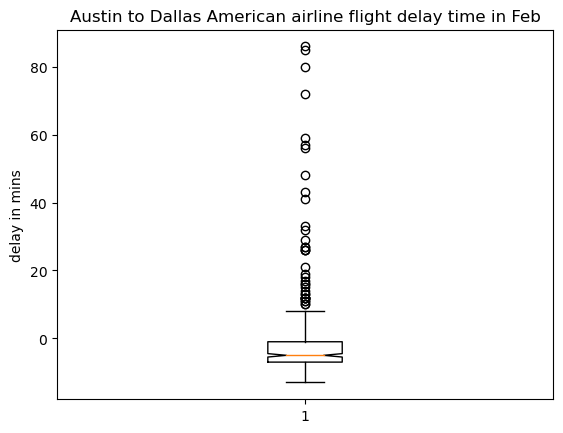

In [11]:
# find outliner of flight delay times
plt.boxplot(df2.delay, notch=True)
plt.title('Austin to Dallas American airline flight delay time in Feb')
plt.ylabel('delay in mins')

###### Visualization 2.  scatter chart  between delay and weather (data from 2 data table)

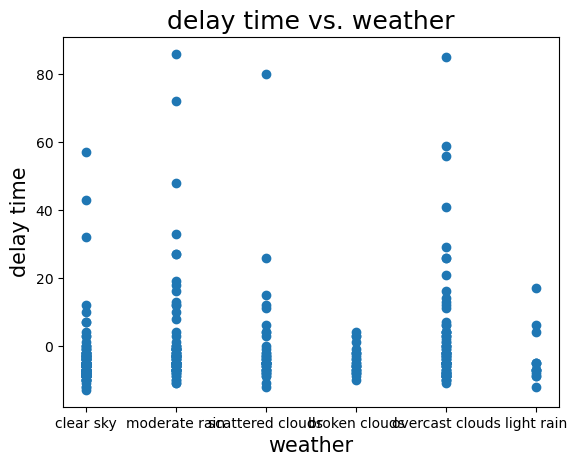

In [32]:
plt.scatter(df2.weather, df2.delay)
plt.title("delay time vs. weather", fontsize=18)
plt.xlabel("weather",fontsize=15)
plt.ylabel("delay time",fontsize=15)
plt.show()

###### Visualization 3.  pie chart  of weather

Text(0.5, 1.0, 'Austin airport Feb weather summary')

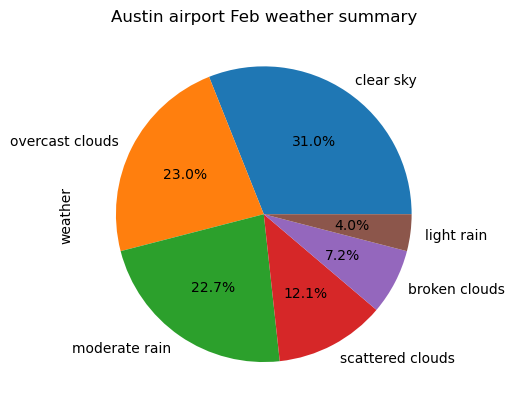

In [34]:
data =df2.weather.value_counts()

data.plot(kind='pie', autopct='%0.1f%%')
plt.title('Austin airport Feb weather summary')

###### Visualization 4.  histogram chart  of temprature

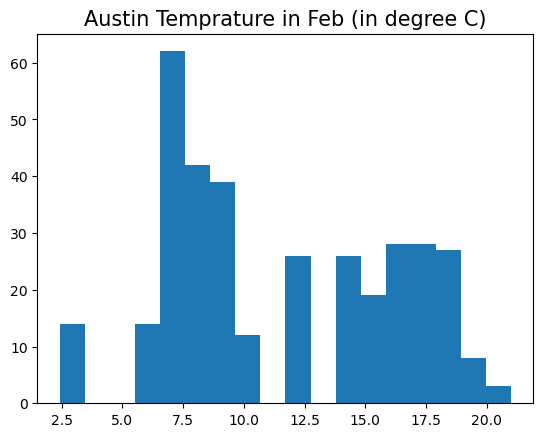

In [38]:
plt.title("Austin Temprature in Feb (in degree C)",fontsize=15)
plt.hist(df2['temp_in_c'],bins=18)
plt.show()

###### Visualization 5.  scatter chart of delay and wind (data from 2 data table)

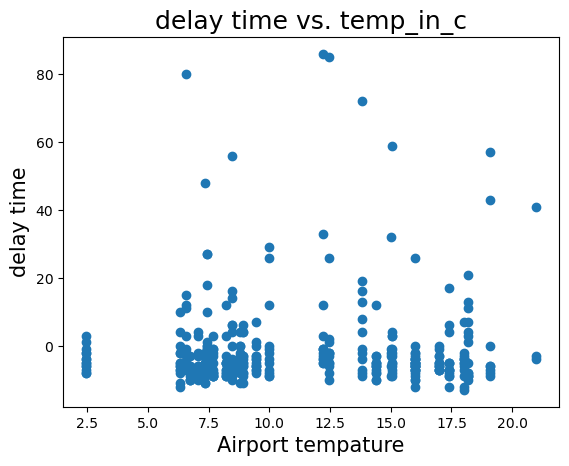

In [37]:
plt.scatter(df2.temp_in_c, df2.delay)
plt.title("delay time vs. temp_in_c", fontsize=18)
plt.xlabel("Airport tempature",fontsize=15)
plt.ylabel("delay time",fontsize=15)
plt.show()

###### see above output 10 for the final dataset

######  Summary: Learning and Ethical implcations

In past few DSC courses, I has get a taste of using python dataframe and make API call. This course is first time to combine everything together for a purpose. 

My first big learning is extracting website info, plus cleanning and transformation. Each website has a differnt way to structure data and tables, there are different ways to handle them as well. Through the exercises, reading materials and youtube, I felt more confident now to get table/data out of a web page. 

My second big learning is the grouping, split/apply/combine the data. This step is crucial to the success of a clean dataset. some basic concepts are same among SQL, R and python. the assignments gave me plenty of exercises and I felt there are much more to learn.

My third big learning is the SQL. I used power BI before but SQL is the backbone of the database. Through the last 2 weeks assignment and last milestone exercise, I am glad to get some basic ideas and methods on how to load, join and extract data in and out of SQL database. I am looking forward to learn more on SQL and database structure.

My forth big learning is the regular expression. text/string data is a common data resource. Though the syntax is easy, applying them logically to extract data correctly is an art. I exercised different combinations to get the right result out and got a better understand on how to combine different rules together like AND /OR.

Overall I am a green hand in coding and data science, I really appreciate the learning from this class, including learning from the summary video from professor and post from classmate.

###### Ethical implications


Ethically, data has a price tag and impact final user's decision making. Also it is a team work to process data, from extract data, clean data, transform data and final analysis to draw conclusion. so data analyst and scientist has both technical responsibility and social responsibility. 

Even in a small and simple project like mine. I run into challanges of how to get data without violating any IP and how to access the data. For data in real business world, I may need to sign a NDA (no discolure agreement) before access the data. 

besides, the data and data wrangling steps are being reviewed by others, so I constantly check result after each transformation to ensure it yields what I am expecting. I would definitely add plenty comments and good summary to ensure next person or user know what the dataset is for, and, where is the limitation. 

Another aspect how data will be used and impact others life. Even though due to scope and purpose of the projects, I do not need to worry about the data authenticity of the data. I also do not need to concern the user and potential usage of the data output. these are all factors need to be considered carefully in a real business or social world. for example, a wrong link of flight and weather will impact travler's decision on how to travel and when to travel. 